In [1]:
%matplotlib inline 

# EDA

## Aim

The aim of this notebook is to do some Exploratory data analysis on the provisioned Instacart Data

## Constants

In [2]:
instacart_dir = "instacart_2017_05_01/"
my_orders_file = "my_orders.csv"
products_file = "products.csv"
aisles_file = "aisles.csv"
departments_file = "departments.csv"

## Import Libraries

In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")

## Useful Functions

### Size Function

In [4]:
def size(obj):
    """Return size of object in MB"""
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

### File Read

In [5]:
def read_csv_file(file_name):
    return pd.read_csv(instacart_dir + file_name)

## Import Data

### Orders Data

In [6]:
orders = read_csv_file(my_orders_file)
# Rename the first column to be order_id
orders=orders.rename(columns = {'Unnamed: 0':'order_id'})
print("Orders, dimension: ",orders.shape, "   size: ", size(orders))
orders.head()

Orders, dimension:  (306, 8)    size:  0.04 MB


,order_id,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12202,472199,765,prior,1,2,21,NaN
1,12203,1424394,765,prior,2,1,21,20.0
2,12204,889292,765,prior,3,6,21,30.0
3,12205,2809253,765,prior,4,3,20,30.0
4,12206,2392861,765,prior,5,1,12,19.0


### Products Data

In [7]:
products = read_csv_file(products_file)
print("Products, dimension: ",products.shape, "   size: ", size(products))
products.head()

Products, dimension:  (49688, 4)    size:  5.57 MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Departments Data

In [8]:
departments = read_csv_file(departments_file)
print("Departments, dimension: ",departments.shape, "   size: ", size(departments))
departments.head()

Departments, dimension:  (21, 2)    size:  0.00 MB


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Aisles Data

In [9]:
aisles = read_csv_file(aisles_file)
print("Aisles, dimension: ",aisles.shape, "   size: ", size(aisles))
aisles.head()

Aisles, dimension:  (134, 2)    size:  0.01 MB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


## Tasks

### Task 1 - Number of Products by Department

In [16]:
# Create the count of products for department_id
product_department_count = (products[["department_id", "product_id"]]
                            .groupby(["department_id",])
                            .size()
                            .reset_index(name='product_count')
                            .sort_values(by=['product_count'], ascending=False))
# Join in the Department to the above Dataframe so the Deparment name is available
product_department_count_info = product_department_count.merge(departments, on="department_id")
product_department_count_info.head(product_department_count_info.shape[0])


,department_id,product_count,department
0,11,6563,personal care
1,19,6264,snacks
2,13,5371,pantry
3,7,4365,beverages
4,1,4007,frozen
5,16,3449,dairy eggs
6,17,3085,household
7,15,2092,canned goods
8,9,1858,dry goods pasta
9,4,1684,produce


### Task 1 - Number of Products by Department - Bar Chart

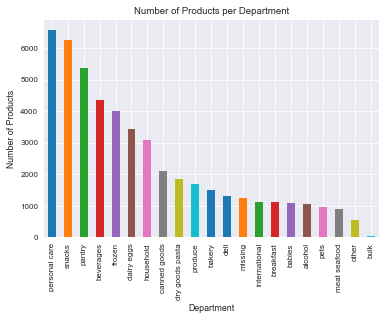

In [17]:
fig, ax = plt.subplots()
product_department_count_info['product_count'].plot.bar()
ax.set_xticklabels(product_department_count_info.department, rotation='vertical')
plt.title("Number of Products per Department")
plt.ylabel("Number of Products")
plt.xlabel("Department")
plt.show()

### Task 2 - How Many Orders do Customers Make